In [2]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/Pankaj-Str/Complete-Python-Mastery/refs/heads/main/54%20Day%20Case%20Study/02/sales_data.csv")

print(data.head())

         Date     Store         City  Revenue Product Category  Quantity  \
0  2023-04-13   Store_2      Phoenix      321             Toys         2   
1  2024-03-11  Store_10      Houston     1513        Groceries         8   
2  2023-12-15   Store_2  Los Angeles     1821        Furniture         9   
3  2023-09-28  Store_10  Los Angeles     1312         Clothing         7   
4  2023-04-17   Store_1      Chicago      426         Clothing         3   

   Employees  Transactions  Payment Method  Discount  Customer_Age  \
0         28            17  Online Payment     13.82            27   
1          6            36  Online Payment     21.60            56   
2         26            19      Debit Card     49.02            45   
3          7            64     Credit Card      3.38            66   
4         16            91  Online Payment     25.94            53   

  Customer_Gender  
0      Non-binary  
1      Non-binary  
2      Non-binary  
3          Female  
4            Male  


In [13]:
%pip install seaborn


import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Data cleaning 

# check for missing values 
print(data.isnull().sum())

Date                0
Store               0
City                0
Revenue             0
Product Category    0
Quantity            0
Employees           0
Transactions        0
Payment Method      0
Discount            0
Customer_Age        0
Customer_Gender     0
dtype: int64


In [4]:
sales_df = data.dropna()
print(sales_df)

           Date     Store         City  Revenue Product Category  Quantity  \
0    2023-04-13   Store_2      Phoenix      321             Toys         2   
1    2024-03-11  Store_10      Houston     1513        Groceries         8   
2    2023-12-15   Store_2  Los Angeles     1821        Furniture         9   
3    2023-09-28  Store_10  Los Angeles     1312         Clothing         7   
4    2023-04-17   Store_1      Chicago      426         Clothing         3   
..          ...       ...          ...      ...              ...       ...   
495  2023-04-24   Store_8     New York     1429         Clothing         3   
496  2023-10-15   Store_1      Phoenix      734         Clothing         9   
497  2024-03-06   Store_3      Phoenix     1977      Electronics         2   
498  2023-12-08  Store_10      Houston     1806         Clothing         9   
499  2023-05-31   Store_9     New York     1704        Groceries         5   

     Employees  Transactions  Payment Method  Discount  Custome

In [7]:
print(data.dtypes)

Date                 object
Store                object
City                 object
Revenue               int64
Product Category     object
Quantity              int64
Employees             int64
Transactions          int64
Payment Method       object
Discount            float64
Customer_Age          int64
Customer_Gender      object
dtype: object


In [9]:
# convert date col to date and time 
data['Date'] = pd.to_datetime(data['Date'])

print(data.dtypes)

Date                datetime64[ns]
Store                       object
City                        object
Revenue                      int64
Product Category            object
Quantity                     int64
Employees                    int64
Transactions                 int64
Payment Method              object
Discount                   float64
Customer_Age                 int64
Customer_Gender             object
dtype: object


In [10]:
# remove duplicates 

data = data.drop_duplicates()
print(data.head())

        Date     Store         City  Revenue Product Category  Quantity  \
0 2023-04-13   Store_2      Phoenix      321             Toys         2   
1 2024-03-11  Store_10      Houston     1513        Groceries         8   
2 2023-12-15   Store_2  Los Angeles     1821        Furniture         9   
3 2023-09-28  Store_10  Los Angeles     1312         Clothing         7   
4 2023-04-17   Store_1      Chicago      426         Clothing         3   

   Employees  Transactions  Payment Method  Discount  Customer_Age  \
0         28            17  Online Payment     13.82            27   
1          6            36  Online Payment     21.60            56   
2         26            19      Debit Card     49.02            45   
3          7            64     Credit Card      3.38            66   
4         16            91  Online Payment     25.94            53   

  Customer_Gender  
0      Non-binary  
1      Non-binary  
2      Non-binary  
3          Female  
4            Male  


In [11]:
# Calculate the total number of transactions recorded in the dataset.
print(data.shape[0])

500


In [ ]:
 
#Identify the store location with the highest total sales revenue.

print(data.groupby('Store')['Revenue'].sum())

Store
Store_1     61734
Store_10    78093
Store_2     46645
Store_3     48520
Store_4     39991
Store_5     64218
Store_6     51657
Store_7     45679
Store_8     35540
Store_9     38449
Name: Revenue, dtype: int64


In [ ]:
#highest total sales revenue by store
print(data.groupby('Store')['Revenue'].sum().idxmax())

Store_10


In [ ]:
# List the top 5 cities in terms of total sales.
print(data.groupby('City')['Revenue'].sum().sort_values(ascending=False).head()) 

City
Chicago        107678
New York       106089
Los Angeles    104965
Phoenix         98623
Houston         93171
Name: Revenue, dtype: int64


In [40]:
# Determine the most sold product category.
product = data.groupby('Product Category')['Quantity'].sum().idxmax()
print(f'Most Sold Product Category is {product}')

Most Sold Product Category is Clothing


In [23]:
print(data.groupby('Product Category')['Quantity'].sum())

Product Category
Clothing       576
Electronics    484
Furniture      531
Groceries      437
Toys           516
Name: Quantity, dtype: int64


In [42]:
# Find the store with the highest average transaction value.
average_transaction =data.groupby('Store')['Transactions'].mean().idxmax()
print(f'The Store with the Highest Average Transaction is {average_transaction}')

The Store with the Highest Average Transaction is Store_8


In [44]:
# Calculate the total revenue generated by each store.
print('Total Revenue generate by the each store')
print(data.groupby('Store')['Revenue'].sum())


Total Revenue generate by the each store
Store
Store_1     61734
Store_10    78093
Store_2     46645
Store_3     48520
Store_4     39991
Store_5     64218
Store_6     51657
Store_7     45679
Store_8     35540
Store_9     38449
Name: Revenue, dtype: int64


In [45]:
# Identify stores with the lowest total revenue
print("Lowest total revenue the store ")
print(data.groupby('Store')['Revenue'].sum().sort_values().head())

Lowest total revenue the store 
Store
Store_8    35540
Store_9    38449
Store_4    39991
Store_7    45679
Store_2    46645
Name: Revenue, dtype: int64


In [46]:
# Compute the revenue generated per employee for each store
print('Revenue Generated per Employee for each Store')
data['Revenue_employee'] = data['Revenue']/data['Employees']
print(data['Revenue_employee'].head())

Revenue Generated per Employee for each Store
0     11.464286
1    252.166667
2     70.038462
3    187.428571
4     26.625000
Name: Revenue_employee, dtype: float64


In [41]:
# Analyze how revenue trends over time
# Convert the 'Date' column to datetime
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Extract the month from the 'Date' column
sales_df['Month'] = sales_df['Date'].dt.month

# Group by month and calculate the total sales for each group
monthly_sales = sales_df.groupby('Month')['Revenue'].sum()

# Print the monthly sales
print(monthly_sales)



Month
1     49762
2     61056
3     47679
4     66539
5     45342
6     36034
7     34038
8     35510
9     30224
10    36176
11    30232
12    37934
Name: Revenue, dtype: int64


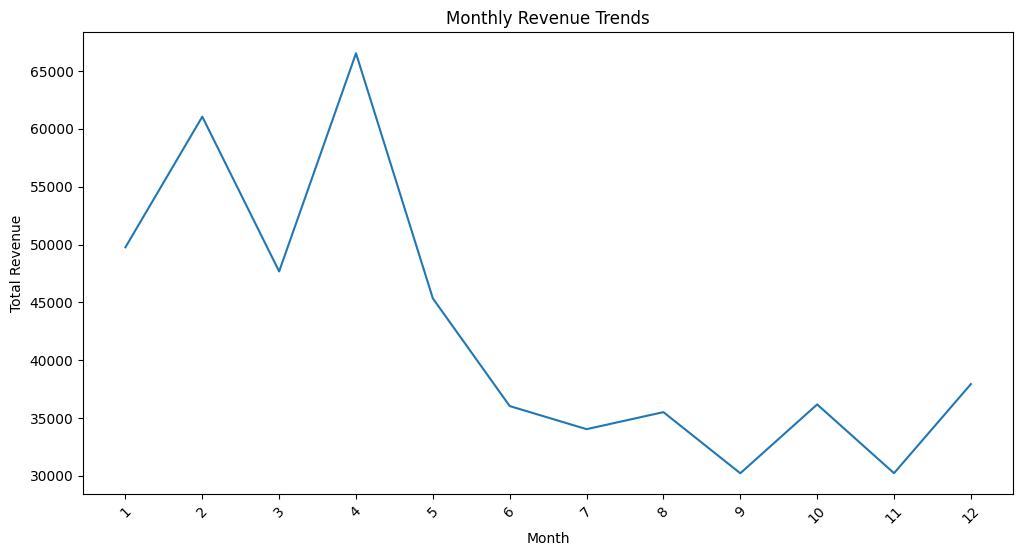

In [ ]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df['Month'] = sales_df['Date'].dt.month
monthly_revenue = sales_df.groupby('Month')['Revenue'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values)
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()


In [18]:
#Find the city with the highest number of transaction.
City = data.groupby('City')["Transactions"].sum().idxmax()
print(f'Highest number of transaction the City is : {City}')

Highest number of transaction the City is : Chicago


In [21]:
#identify the best-selling product based on the quantity sold
best_sell = data.groupby('Product Category')['Quantity'].sum().idxmax()
print(f'Best-Selling Product based on the Quantity sold : {best_sell}')

Best-Selling Product based on the Quantity sold : Clothing


In [23]:
#Determine which store has the highest number of transaction
Transaction = data.groupby('Store')['Transactions'].sum().idxmax()
print(f'Highest Number of Transaction done by {Transaction} Store')

Highest Number of Transaction done by Store_10 Store


In [24]:
#compute the average revenue per transactioon across all store
avg_revenue_per_transaction = sales_df['Revenue'].sum() / sales_df['Transactions'].sum()
print(f'average revenue per transactioon across all store {avg_revenue_per_transaction}')

average revenue per transactioon across all store 20.817403359973902


In [ ]:
#identity the month with highest sales
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df['Month'] = sales_df['Date'].dt.month

monthly_sales = sales_df.groupby('Month')['Revenue'].sum().idxmax()
print(f'Highest sales of the month : {monthly_sales}')

Highest sales of the month 4


In [ ]:
#Find out which day of the week has the highest sales.
sales_df['Day_of_Week'] = sales_df['Date'].dt.day_name()
best_day = sales_df.groupby('Day_of_Week')['Revenue'].sum().idxmax()
print(f"\nDay of the week with highest sales: {best_day}")


Day of the week with highest sales: Monday


In [37]:
#compare the between weekdays and weekends.
data['Date'] = pd.to_datetime(data['Date'])

# Create an 'Is_Weekend' column
data['Is_Weekend'] = data['Date'].dt.dayofweek >= 5  # Saturday and Sunday are 5 and 6

# Group by 'Is_Weekend' and sum the 'Revenue'
weekday_vs_weekend = data.groupby('Is_Weekend')['Revenue'].sum()

print("\nSales comparison between weekdays and weekends:")
print(weekday_vs_weekend)


Sales comparison between weekdays and weekends:
Is_Weekend
False    352375
True     158151
Name: Revenue, dtype: int64


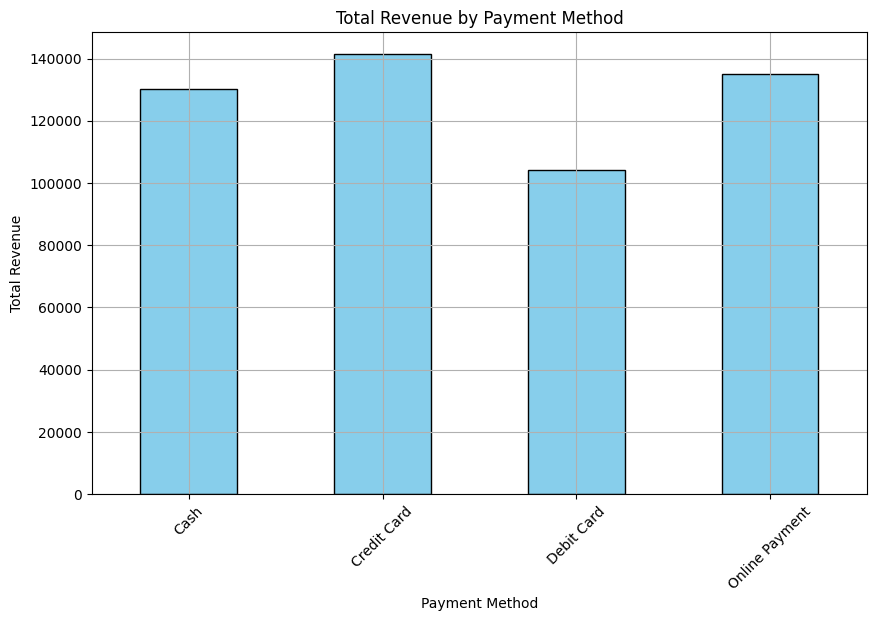

In [35]:
#calculate total revenue based on different payment methods
revenue_by_payment_method = data.groupby('Payment Method')['Revenue'].sum()
revenue_by_payment_method.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Total Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Correlation between discounts and revenue:
          Discount   Revenue
Discount  1.000000  0.033525
Revenue   0.033525  1.000000


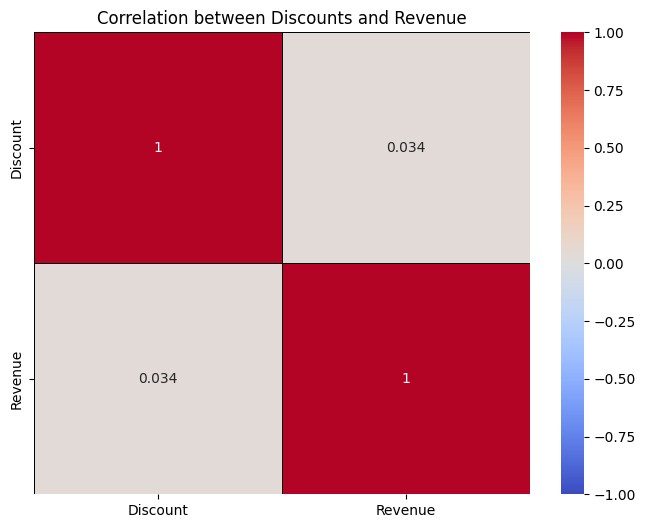

In [36]:
#Analyze the correlection between discount and revenue
correlation = sales_df[['Discount', 'Revenue']].corr()
print("\nCorrelation between discounts and revenue:")
print(correlation)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=.5, linecolor='black')
plt.title('Correlation between Discounts and Revenue')
plt.show()